# Polynomial Regression

f(x) = w_1x + w_2x^2 + w_3x^3 + b$

## Tạo data

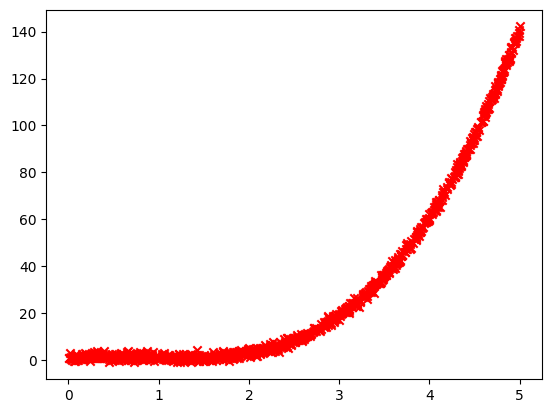

In [44]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

# Generate sample data suitable for Polynomial Regression (e.g., cubic)
np.random.seed(0) # for reproducibility
X = np.sort(5 * np.random.rand(1000, 1), axis=0)
# Generate y based on a cubic function with noise
y = 2 * X**3 - 5 * X**2 + 3 * X + 1 + np.random.normal(0, 1, size=(1000, 1)) # Add some noise

plt.scatter(X, y, marker='x', c='r')
plt.show()

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

## Cài đặt mô hình và huấn luyện

Thời gian huấn luyện: 0.43489813804626465
Weight cuối cùng: -0.4273, -0.6062, 1.1928
Bias cuối cùng: -0.1863


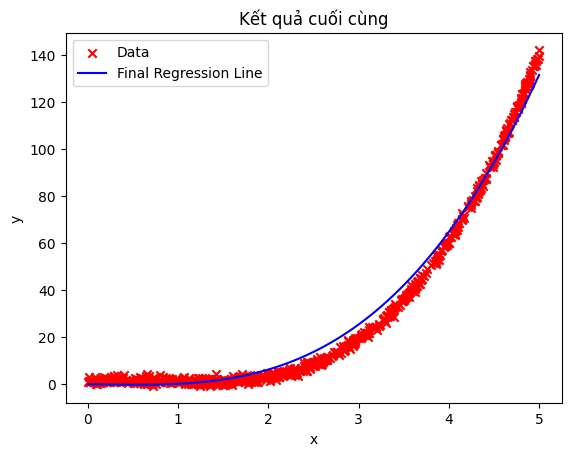

In [48]:
import time

def predict(x, weight, bias):
    """Tính giá trị dự đoán y = wx + b"""
    return weight[0] * x + weight[1] * x**2 + weight[2] * x**3 + bias

def compute_gradients(x, y, weight, bias):
    """Tính gradient cho weight và bias"""
    predictions = predict(x, weight, bias)
    errors = predictions - y
    dw0 = np.mean(errors * x)  # Gradient cho weight0
    dw1 = np.mean(errors * x **2)  # Gradient cho weight1
    dw2 = np.mean(errors * x **3)  # Gradient cho weight2
    db = np.mean(errors)      # Gradient cho bias
    return dw0, dw1, dw2, db

def train_polynominal_regression(x, y, learning_rate=0.0001, epochs=30):
    """
    Args:
        x: numpy array, biến độc lập
        y: numpy array, biến phụ thuộc
        learning_rate: tốc độ học
        eras: số vòng lặp huấn luyện
    Returns:
        weight, bias: tham số mô hình đã huấn luyện
    """
    # Khởi tạo tham số
    weight = [0.0, 0.0, 0.0]
    bias = 0.0

    # Kiểm tra đầu vào
    if len(x) != len(y):
        raise ValueError("Kích thước của x và y phải bằng nhau")
    if len(x) == 0:
        raise ValueError("Dữ liệu đầu vào rỗng")

    # Huấn luyện mô hình
    for epoch in range(epochs):
        # Tính gradient
        dw0, dw1, dw2, db = compute_gradients(x, y, weight, bias)

        # Cập nhật tham số
        weight[0] -= learning_rate * dw0
        weight[1] -= learning_rate * dw1
        weight[2] -= learning_rate * dw2
        bias -= learning_rate * db

    return weight, bias

try:
    st = time.time()
    # Huấn luyện mô hình
    final_weight, final_bias = train_polynominal_regression(x_train, y_train, 1e-4, 1000)
    ed = time.time()
    print(f"Thời gian huấn luyện: {ed-st}")
    print(f"Weight cuối cùng: {final_weight[0]:.4f}, {final_weight[1]:.4f}, {final_weight[2]:.4f}")
    print(f"Bias cuối cùng: {final_bias:.4f}")

    # Vẽ đồ thị cuối cùng
    plt.clf()
    plt.scatter(x_train, y_train, marker='x', c='red', label='Data')
    # Generate a range of x values for the smooth curve
    x_smooth = np.linspace(min(x_train), max(x_train), 100).reshape(-1, 1)
    y_smooth = predict(x_smooth, final_weight, final_bias)
    plt.plot(x_smooth, y_smooth, c='blue', label='Final Regression Line')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Kết quả cuối cùng')
    plt.legend()
    plt.show()
except Exception as e:
    print(f"Lỗi trong quá trình huấn luyện: {str(e)}")

In [49]:
# test mô hình
y_pred = predict(x_test, final_weight, final_bias)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 16.456211523425697


Thời gian huấn luyện: 0.15283846855163574
Weight cuối cùng: 0.1153, 4.2400, 29.2930
Bias cuối cùng: -0.3146


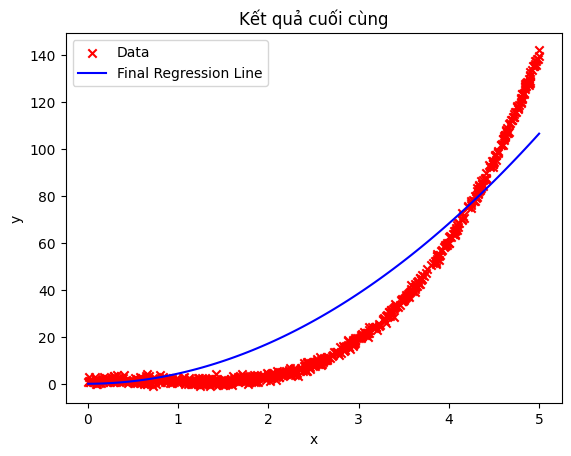

In [50]:
def predict(x, weight, bias):
    """Tính giá trị dự đoán y = wx + b"""
    return weight[0] * x + weight[1] * x**2

try:
    st = time.time()
    # Huấn luyện mô hình
    final_weight, final_bias = train_polynominal_regression(x_train, y_train, 1e-4, 1000)
    ed = time.time()
    print(f"Thời gian huấn luyện: {ed-st}")
    print(f"Weight cuối cùng: {final_weight[0]:.4f}, {final_weight[1]:.4f}, {final_weight[2]:.4f}")
    print(f"Bias cuối cùng: {final_bias:.4f}")

    # Vẽ đồ thị cuối cùng
    plt.clf()
    plt.scatter(x_train, y_train, marker='x', c='red', label='Data')
    # Generate a range of x values for the smooth curve
    x_smooth = np.linspace(min(x_train), max(x_train), 100).reshape(-1, 1)
    y_smooth = predict(x_smooth, final_weight, final_bias)
    plt.plot(x_smooth, y_smooth, c='blue', label='Final Regression Line')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Kết quả cuối cùng')
    plt.legend()
    plt.show()
except Exception as e:
    print(f"Lỗi trong quá trình huấn luyện: {str(e)}")